## Import module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading data

In [2]:
df = pd.read_csv("data/merged_all_data_common_columns.csv")

In [6]:
df.head()

,Room Type,Area_m2_cleaned,Bed Type,Hotel Link,Facilities_cleaned,Total_Guests,Final Price,Hotel Name
0,Căn Hộ 1 Phòng Ngủ,60,"2 giường (1 giường đôi rất lớn, 1 giường sofa)",https://www.booking.com/hotel/vn/bom-homes-vin...,"căn hộ 1 phòng ngủ, căn hộ nguyên căn, 60 m², ...",1,9720000.0,*BOM HOMES* VINHOMES CENTRAL PARK- LUXURY APAR...
1,Căn Hộ 2 Phòng Ngủ,85,"3 giường (1 giường đôi rất lớn, 1 giường sofa,...",https://www.booking.com/hotel/vn/bom-homes-vin...,"căn hộ 2 phòng ngủ, căn hộ nguyên căn, 85 m², ...",5,10260000.0,*BOM HOMES* VINHOMES CENTRAL PARK- LUXURY APAR...
2,Căn Hộ 1 Phòng Ngủ,60,"2 giường (1 giường đôi rất lớn, 1 giường sofa)",https://www.booking.com/hotel/vn/bom-homes-vin...,"căn hộ 1 phòng ngủ, căn hộ nguyên căn, 60 m², ...",7,19980000.0,*BOM HOMES* VINHOMES CENTRAL PARK- LUXURY APAR...
3,Phòng Có Giường Cỡ Queen,13,Phòng Có Giường Cỡ Queen,https://www.booking.com/hotel/vn/1-am-homestay...,"phòng có giường cỡ queen, wifi miễn phí, điều ...",1,1539000.0,1 AM Home Sai Gon
4,Phòng Có Giường Cỡ Queen,13,Phòng Có Giường Cỡ Queen,https://www.booking.com/hotel/vn/1-am-homestay...,"phòng có giường cỡ queen, wifi miễn phí, điều ...",2,1620000.0,1 AM Home Sai Gon


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14954 entries, 0 to 14953
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Room Type           13729 non-null  object 
 1   Area_m2_cleaned     11560 non-null  object 
 2   Bed Type            12890 non-null  object 
 3   Hotel Link          14954 non-null  object 
 4   Facilities_cleaned  11872 non-null  object 
 5   Total_Guests        13662 non-null  object 
 6   Final Price         13725 non-null  float64
 7   Hotel Name          14954 non-null  object 
dtypes: float64(1), object(7)
memory usage: 934.8+ KB


In [8]:
df.shape  

(14954, 8)

## Visualize

In [27]:
# Kiểm tra data types và missing values
print("Data types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())
print("\nDescribe numeric columns:")
print(df.describe())

Data types:
Room Type              object
Area_m2_cleaned        object
Bed Type               object
Hotel Link             object
Facilities_cleaned     object
Total_Guests           object
Final Price           float64
Hotel Name             object
dtype: object

Missing values:
Room Type             1225
Area_m2_cleaned       3394
Bed Type              2064
Hotel Link               0
Facilities_cleaned    3082
Total_Guests          1292
Final Price           1229
Hotel Name               0
dtype: int64

Describe numeric columns:
        Final Price
count  1.372500e+04
mean   8.287109e+06
std    1.414493e+07
min    1.697690e+05
25%    1.710000e+06
50%    4.140000e+06
75%    9.058200e+06
max    4.500000e+08


In [3]:
# Clean data: convert types và dropna nếu cần
df['Area_m2_cleaned'] = pd.to_numeric(df['Area_m2_cleaned'], errors='coerce')
df['Total_Guests'] = pd.to_numeric(df['Total_Guests'], errors='coerce')
# Drop rows with missing Final Price hoặc Area nếu cần cho visualize
df_clean = df.dropna(subset=['Final Price', 'Area_m2_cleaned', 'Total_Guests'])

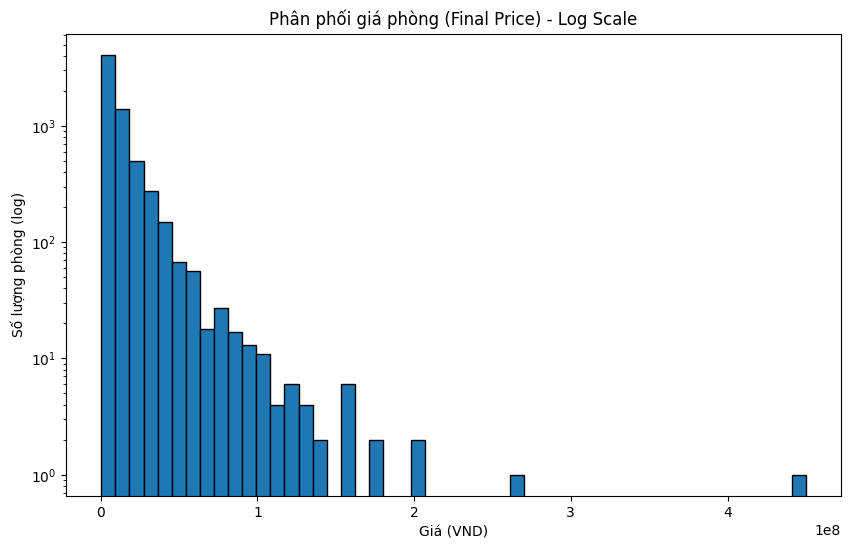

In [29]:
# Histogram phân phối giá với log scale (để handle giá lớn)
import numpy as np
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Final Price'], bins=50, edgecolor='black', log=True)
plt.title('Phân phối giá phòng (Final Price) - Log Scale')
plt.xlabel('Giá (VND)')
plt.ylabel('Số lượng phòng (log)')
plt.show()

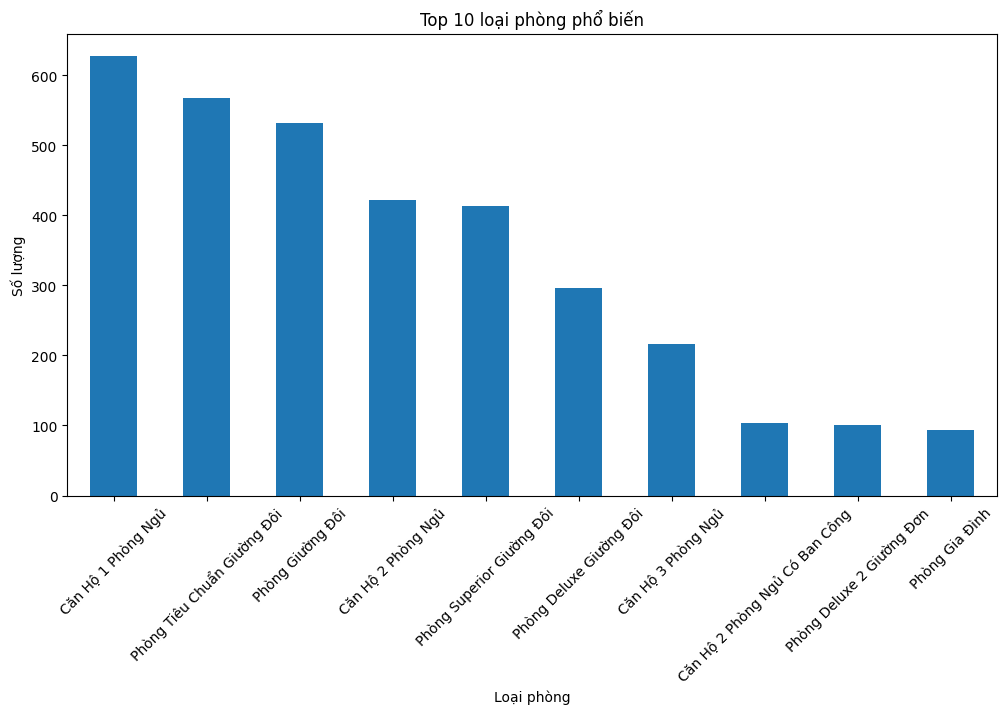

In [30]:
# Bar chart top 10 loại phòng
top_rooms = df_clean['Room Type'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_rooms.plot(kind='bar')
plt.title('Top 10 loại phòng phổ biến')
plt.xlabel('Loại phòng')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()

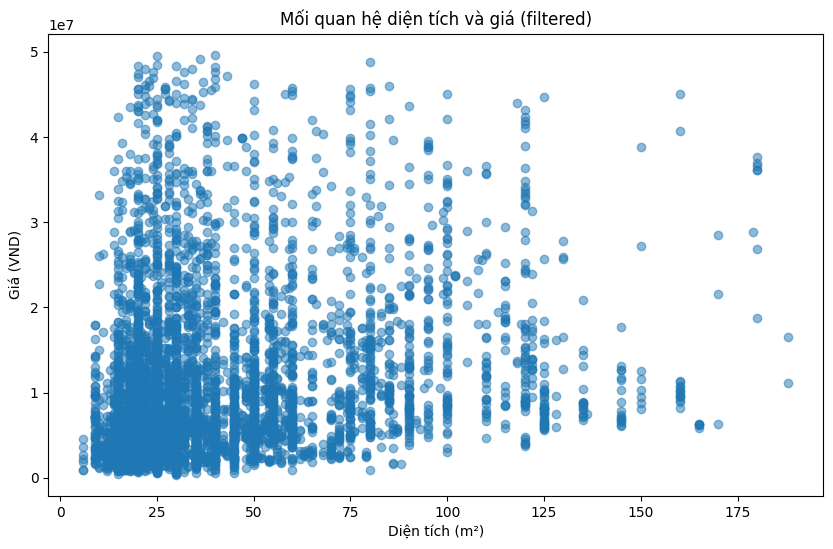

In [31]:
# Scatter plot diện tích vs giá (filter outliers)
filtered_df = df_clean[(df_clean['Final Price'] < 50000000) & (df_clean['Area_m2_cleaned'] < 200)]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Area_m2_cleaned'], filtered_df['Final Price'], alpha=0.5)
plt.title('Mối quan hệ diện tích và giá (filtered)')
plt.xlabel('Diện tích (m²)')
plt.ylabel('Giá (VND)')
plt.show()

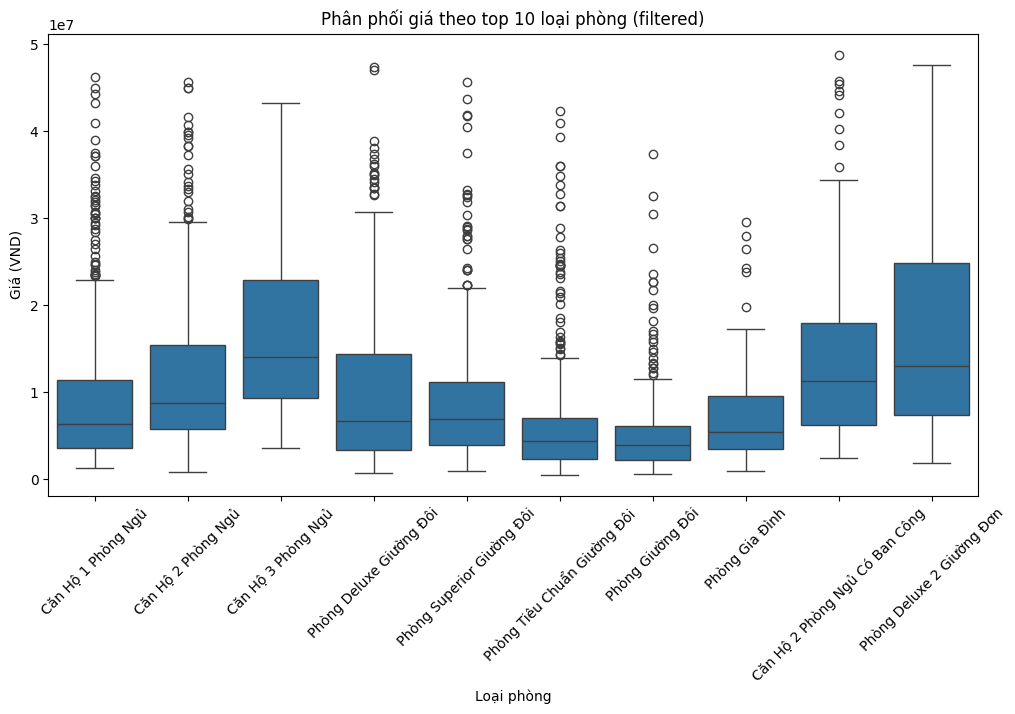

In [4]:
# Box plot giá theo top 10 loại phòng (filtered)
import seaborn as sns
top_rooms_list = df_clean['Room Type'].value_counts().head(10).index
filtered_df = df_clean[df_clean['Room Type'].isin(top_rooms_list) & (df_clean['Final Price'] < 50000000)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Room Type', y='Final Price', data=filtered_df)
plt.title('Phân phối giá theo top 10 loại phòng (filtered)')
plt.xlabel('Loại phòng')
plt.ylabel('Giá (VND)')
plt.xticks(rotation=45)
plt.show()

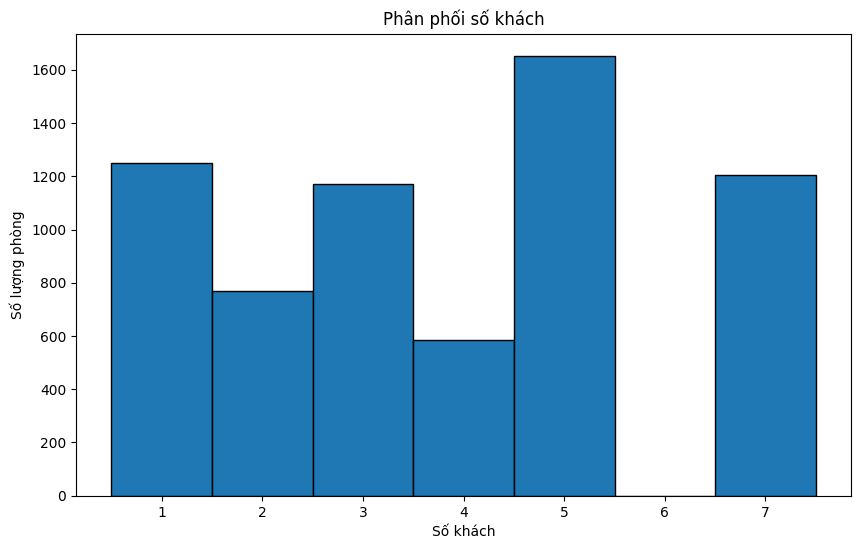

In [5]:
# Histogram số khách
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Total_Guests'], bins=range(1, int(df_clean['Total_Guests'].max())+2), edgecolor='black', align='left')
plt.title('Phân phối số khách')
plt.xlabel('Số khách')
plt.ylabel('Số lượng phòng')
plt.show()